In [3]:
# sklearn dataset : https://scikit-learn.org/stable/datasets/index.html

from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, fbeta_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
# ---------- X : dataframe 피쳐 , clables:centroid_pred
def myscore(X, clabels, model=None):
    score_df = pd.DataFrame()
    scoef = silhouette_samples(X, clabels)
    score_df["scoef"] = scoef
    score_df["cluster_pred"] = clabels

    print("전체 평균  실루엣 계수:", np.mean(scoef))
    print(score_df.groupby("cluster_pred")["scoef"].mean())
    
    if model != None:
        #inertia_ : Sum of squared distances of samples to their closest cluster center.
        #중앙점으로부터 각 점들의 거리^2 합
        #작을수록 중앙점으로 몰려있다 = 응집도가 높다
        print("응집도 : ", model.inertia_) #응집도

In [5]:
dataset = load_iris()
df = pd.DataFrame(data=dataset.data,
                  #columns=dataset.feature_names
                  columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
                  )
# df["target"] = dataset.target

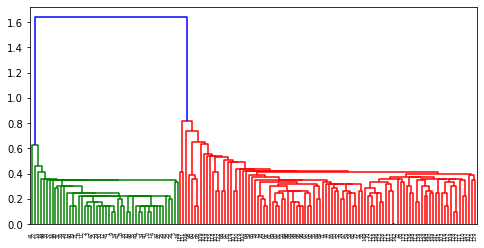

In [8]:
plt.figure(figsize=(8,4))
matrix = linkage(df, method='single', metric='euclidean')
dendrogram(matrix)
plt.show()